### 網路爬蟲並分析
+ 資料來源：https://www.ptt.cc/bbs/index.html

### 若無法正常顯示該頁時
+ 請將該頁 github 網址複製貼至 https://nbviewer.jupyter.org/ 輸入框上

### 欲處理與分析的方向
+ 爬取 HatePolitics 版上熱門的文章，進而分析是否與標題有相關聯

### 資料的取得
+ 透過 requests 模擬瀏覽器發送請求，進而取得回傳的 html
+ 請求有兩種：Get、Post，依據各網頁而有所不同
+ 使用 beautifulSoup 過濾文章：篩選推文大於 50 且為正常的文章
+ 使用 pandas 將爬取下來的資料作整理與進一步的操作(甚至能輸出 csv)

In [22]:
import requests as reqs
import pandas as pd
import numpy as np
import pyprind
import urllib3

from bs4 import BeautifulSoup

# 關閉不安全的請求警示文字
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# 儲存 loc 之 index 變數
dfsIndex = 0

# 預計抓多少篇文章
maxCatch = 300

# 要爬的網頁網址
url = 'https://www.ptt.cc/bbs/HatePolitics/index' # 'https://www.ptt.cc/bbs/sex/index'
url_suffix = '.html'

# post 預載資訊
preload = {
    "from": "/bbs/HatePolitics/index.html",
    "yes": "yes"
}

# 自訂要抓取 ptt 的 html index 範圍 
pageIndexStart = 3700
pageIndexEnd = 4058

# 設定讀取 Bar
pbar = pyprind.ProgBar(pageIndexEnd - pageIndexStart)

tempRes = reqs.session()
response = tempRes.post('https://www.ptt.cc/ask/over18', verify=False, data=preload)

# 自定義存放爬蟲資料的格式
dfs = pd.DataFrame(np.random.randn(10, 4), columns=['推文數', '發文日期', '作者', '標題'])

# 抓 pageIndexStart ~ pageIndexEnd 的頁數中推文超過 maxCatch 個的文章
for i in range(pageIndexStart, pageIndexEnd):
    response = tempRes.get(url + str(i) + url_suffix, verify=False)
    soup = BeautifulSoup(response.text, "lxml")
    
    # 提前結束爬蟲
    if dfsIndex > maxCatch:
        print('提前結束')
        break
    
    # 抓取符合的文章結構
    for entry in soup.select('.r-ent'):
        # 作者字串長度至少大於 3 且 (推文為爆 或 推文數須為數字且推文數超過 50)
        if ((len(entry.select('.author')[0].text) > 3) and 
            (entry.select('.nrec')[0].text == '爆' or 
             (entry.select('.nrec')[0].text.isdigit() and int(entry.select('.nrec')[0].text) >= 50))):
#             print('將資料存入dfs[%s]=%s' % (dfsIndex, 'https://www.ptt.cc' + entry.select('.title a')[0]['href']))
            dfs.loc[dfsIndex] = [entry.select('.nrec')[0].text, entry.select('.date')[0].text, entry.select('.author')[0].text, entry.select('.title')[0].text.strip('\n,').replace('　',' ')]
            dfsIndex += 1
    pbar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:58


### 顯示剛爬完整理至 pandas 的 dataFrame 資料
+ 顯示前五筆資料：dfs.head()
+ 顯示末五筆資料：dfs.tail()
+ 顯示全部資料：dfs

In [23]:
dfs

,推文數,發文日期,作者,標題
0,爆,1/22,Wojnarowski,[新聞] 段宜康要求說清楚 柯文哲嗆：曲棍球吞下
1,83,1/22,KingKingCold,Re: [新聞] 段宜康要求說清楚 柯文哲嗆：曲棍球吞下
2,84,1/22,kero2377,[討論] 政黑現在是柯粉多還韓粉多
3,爆,1/22,Wojnarowski,[討論] 柯P嗆吞曲棍球 段宜康表示：不回應
4,59,1/22,e8804282,[新聞] 「高雄發不了大財了」 林濁水要韓國瑜「
5,爆,1/22,mark2165,[Live] 【完整公開】北上助攻 韓國瑜當定心丸~~
6,50,1/22,outdowave,[新聞] 柯P嗆段宜康吞曲棍球 梁文傑：沒禮貌
7,88,1/22,mark2165,[討論] 韓國瑜18:00直播
8,爆,1/22,KingKingCold,Re: [討論] 柯文哲越向藍營靠攏 蔡會得利嗎?
9,爆,1/22,mark2165,[Live] 韓國瑜


### 將取得的資料進一步分析
+ 使用 jieba 套件將標題執行斷字與停用字的過濾後，找出頻繁出現的字詞
+ 利用這些熱門的文章來檢視標題是否有代表著關鍵性的字詞

In [171]:
import jieba
from collections import Counter

terms = []

# 中文的斷字，如果是使用繁體文字，請記得去下載繁體字典來使用 ref https://github.com/ldkrsi/jieba-zh_TW
jieba.set_dictionary('jieba\dict.txt')
jieba.add_word('韓國瑜')

# 中文的停用字 ref https://github.com/GoatWang/ithome_ironman/blob/master/day16_NLP_Chinese/stops.txt
with open('jieba\stopWords.txt', 'r', encoding='utf8') as f:
    stops = f.read().split('\n')
    
# 將爬到的資料做斷字並判斷是否為停用字後將關鍵字詞 append 至 terms 變數
for i in range(len(dfs)):
    tempList = [t for t in jieba.cut(dfs.iloc[:, 3].values[i]) if t not in stops]
    for temp in tempList:
        terms.append(temp)

Building prefix dict from C:\codeDevelop\Anaconda3\jupyter workspace\jieba\dict.txt ...
Loading model from cache C:\Users\Ken\AppData\Local\Temp\jieba.ua3c31d0fb85c56af091289fc50776920.cache
Loading model cost 0.560 seconds.
Prefix dict has been built succesfully.


### 分析結果的呈現
+ 將出現的字詞做統計並排序顯示
+ 使用文字雲呈現關鍵性字詞
+ 使用直方圖呈現關鍵性字詞與次數

In [172]:
# 排序
sortTerms = sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)
sortTerms

[('討論', 46),
 ('新聞', 26),
 ('韓國瑜', 22),
 ('柯文哲', 21),
 ('Live', 21),
 ('Re', 14),
 ('嗆', 7),
 ('柯P', 7),
 ('高雄', 7),
 ('年代', 6),
 ('錢', 6),
 ('關鍵', 6),
 ('時刻', 6),
 ('民進黨', 6),
 ('公開', 5),
 ('風向', 5),
 ('黑特', 5),
 ('逐字', 5),
 ('稿', 5),
 ('段宜康', 4),
 ('曲棍球', 4),
 ('現在', 4),
 ('完整', 4),
 ('禮貌', 4),
 ('真的', 4),
 ('選', 4),
 ('190123', 4),
 ('專訪', 4),
 ('FB', 4),
 ('館長', 4),
 ('吳董', 3),
 ('暐', 3),
 ('瀚', 3),
 ('鄉民', 3),
 ('團向', 3),
 ('KKC', 3),
 ('宣戰', 3),
 ('陳', 3),
 ('民調', 3),
 ('柯', 3),
 ('台灣', 3),
 ('轉錄', 3),
 ('氣爆', 3),
 ('清晨', 3),
 ('韓', 3),
 ('後', 3),
 ('月', 3),
 ('拚', 3),
 ('陳思宇', 3),
 ('新', 3),
 ('刁', 3),
 ('高市府', 3),
 ('垃圾', 3),
 ('要求', 2),
 ('說清楚', 2),
 ('吞下', 2),
 ('政黑', 2),
 ('吞', 2),
 ('直播', 2),
 ('龍介', 2),
 ('明通', 2),
 ('2020', 2),
 ('威脅到', 2),
 ('會長', 2),
 ('龍捲風', 2),
 ('臉書', 2),
 ('陳冠榮', 2),
 ('自救會', 2),
 ('市府', 2),
 ('戰犯', 2),
 ('早年', 2),
 ('支持', 2),
 ('DPP', 2),
 ('<', 2),
 ('執著', 2),
 ('年', 2),
 ('韓總', 2),
 ('根本', 2),
 ('搞懂', 2),
 ('以色列', 2),
 ('八卦版', 2),
 ('招商', 2),
 ('

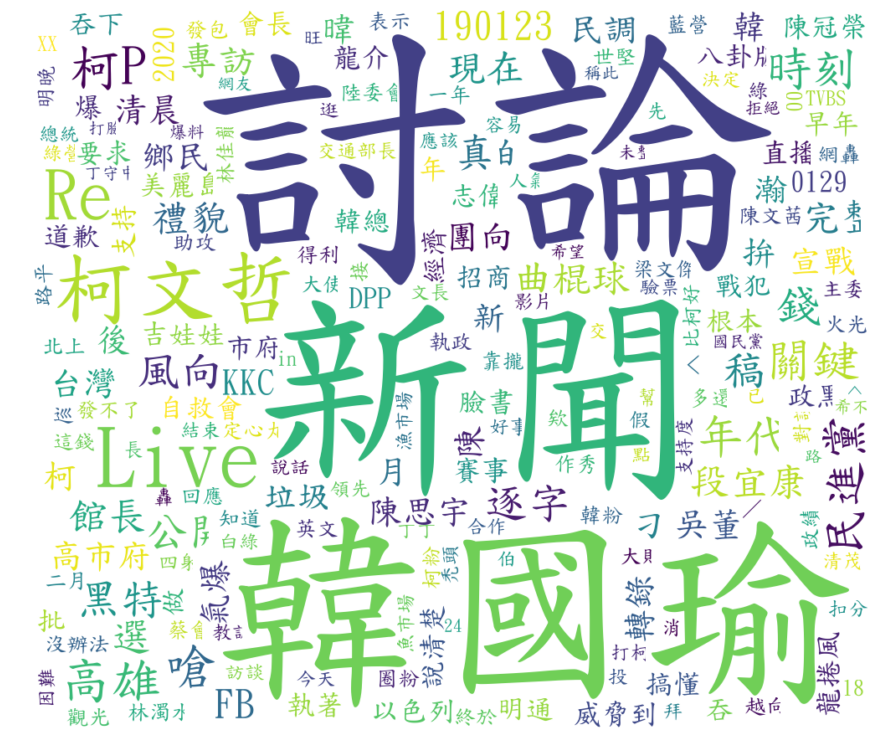

In [168]:
%matplotlib inline
import matplotlib.pyplot as plt

from wordcloud import WordCloud

# 若處理中文時務必指定字形檔
wordcloud = WordCloud(background_color="white", width=1000, height=860, margin=2, font_path="c:\windows\fonts\kaiu.ttf")
wordcloud.generate_from_frequencies(frequencies=Counter(terms))  

# 畫文字雲圖顯示
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

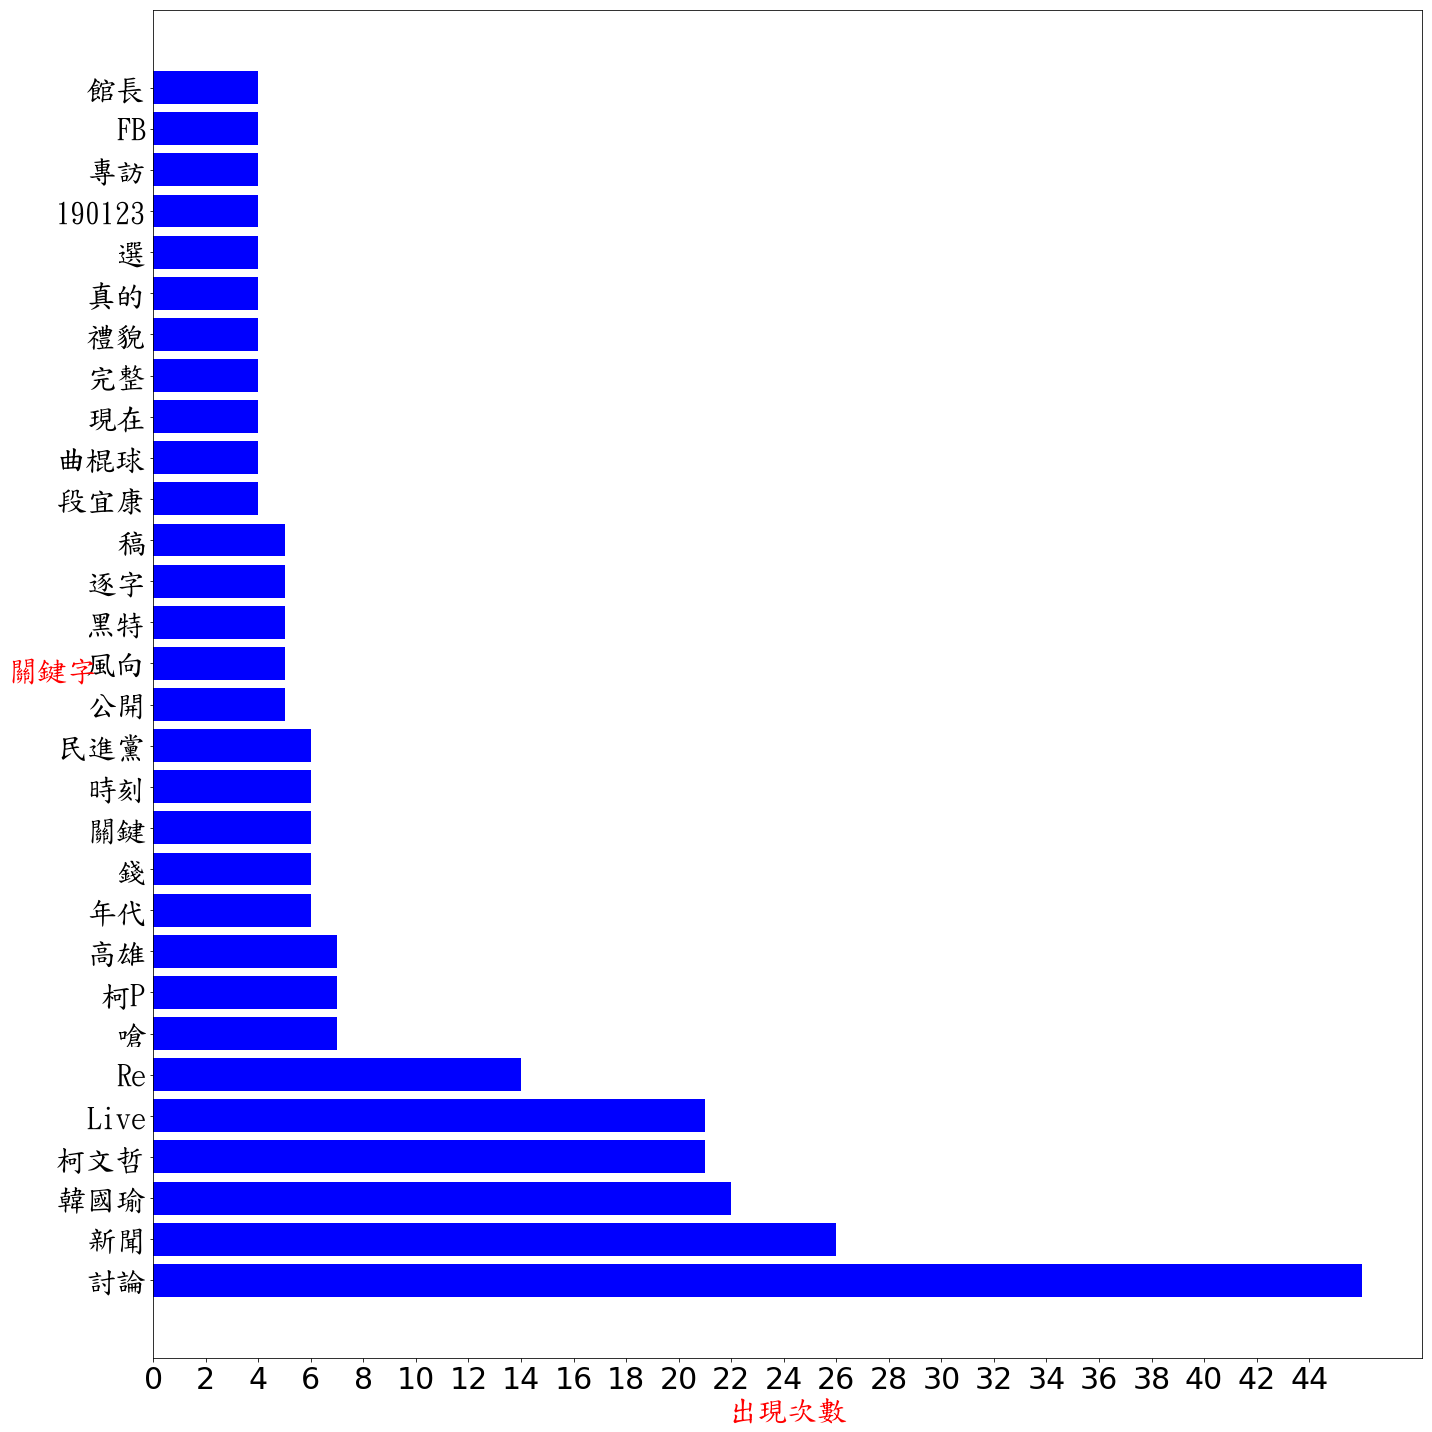

In [186]:
x = []
y = []
for i in range(len(sortTerms)):
    # 過濾次數太低的關鍵字
    if sortTerms[i][1] >= 4:
        x.append(sortTerms[i][0])
        y.append(sortTerms[i][1])
        
# FontProperties() 設置的是 Windows 系统本身的標楷體
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\kaiu.ttf", size=18)

# 畫直方圖
plt.figure(figsize=(20, 20))
plt.barh(x, y, color='blue')
plt.xticks(np.arange(0, y[0], 2), fontsize=30)
plt.yticks(fontproperties=font, fontsize=30)
plt.xlabel('出現次數', fontproperties=font, fontsize=30, color='red')
plt.ylabel('關鍵字', fontproperties=font, fontsize=30, rotation=0, color='red')
plt.tight_layout()
plt.show()